In [163]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import scipy.stats as stats
from scipy.stats import spearmanr
import ast
from scipy.stats import kstest

In [164]:
out = r"C:\Users\Maciek\Documents\Studia\Magisterka\Images"
model_name = "SVM"
task = "Amazon"

In [165]:
# Method used to decode filename of model into balancing method, imbalance %, model name, and model id returned in an array
def get_method_and_percentage(name):
    string = "_".join(name.split("_")[:-1])
    percentage = ""
    perc = 0
    for i in range(len(string)):
        if string[i].isdigit():
            perc = i
            percentage += string[i]
        elif perc>0:
            break
    perc+=2 if len(percentage)>0 else 0
    method = ""
    for i in range(perc, len(string)):
        if string[i].isdigit():
            model_id = string[i]
        else:
            method += string[i]
    method = "_".join(method.split("_")[:-1])
    model = name.split("_")[-1][:-4]
    model_id = name.split("_")[-2].split(".")[0]
    return [method, percentage, model, model_id]


if task == "Amazon":
    df = pd.read_csv(fr"C:\Users\Maciek\Documents\Studia\Magisterka\GitHub\BalancingMethodsNLP\Results\XAI_results_amazon_{model_name}.csv")
else:
    df = pd.read_csv(fr"C:\Users\Maciek\Documents\Studia\Magisterka\GitHub\BalancingMethodsNLP\Results\XAI_results_final_{model_name}.csv")

# for i in range(2,5):
#     df = pd.concat([df, pd.read_csv(f"XAI_results{i}.csv")])
pd.set_option('display.width', 1000)

df2=df
name = pd.DataFrame(list(df["model"].map(lambda x:get_method_and_percentage(x))))
name.columns = ["Balancing method", "Imbalance %", "Model name", "Model ID"]
df = pd.concat([name, df[df.columns[2:]]], axis=1)
df = df.sort_values(["id", "Imbalance %", "Model ID", "Balancing method", "Model name"])
df.columns = [str(col).replace("eval_", "") for col in df.columns]

df = df[df["Balancing method"]!="amazon_review"]
df


,Balancing method,Imbalance %,Model name,Model ID,id,words_sentence,lime_sentence,words_word,lime_word
4400,Contextual_word_embedding,10,SVM,0,0,"['junk', 'I', 'bought', 'this', 'item', 'today...","[-0.0015522850742263488, 0.0008345848765135373...",['4' '5' '8gb' 'After' 'Aside' 'I' 'Kmart' 'Ma...,"[-0.00042807812269736033, -0.00017076483507687..."
360,LLama_complex,10,SVM,0,0,"['junk', 'I', 'bought', 'this', 'item', 'today...","[-0.0021397040786155946, -0.000333248112830610...",['4' '5' '8gb' 'After' 'Aside' 'I' 'Kmart' 'Ma...,"[-0.0006521026826422468, 0.0009065072849797304..."
3120,LLama_simple,10,SVM,0,0,"['junk', 'I', 'bought', 'this', 'item', 'today...","[-0.002069639058015481, -0.0003755283346681519...",['4' '5' '8gb' 'After' 'Aside' 'I' 'Kmart' 'Ma...,"[-0.0003099562505406507, 0.0007149771825813891..."
1320,ROS,10,SVM,0,0,"['junk', 'I', 'bought', 'this', 'item', 'today...","[-6.022134599316651e-05, 1.94252710612382e-05,...",['4' '5' '8gb' 'After' 'Aside' 'I' 'Kmart' 'Ma...,"[-4.724273368636932e-05, -7.641659802948542e-0..."
3480,Summarization,10,SVM,0,0,"['junk', 'I', 'bought', 'this', 'item', 'today...","[-0.0046367359936304205, 3.17960781766001e-05,...",['4' '5' '8gb' 'After' 'Aside' 'I' 'Kmart' 'Ma...,"[-0.0008069042856828336, -0.000235695105039262..."
...,...,...,...,...,...,...,...,...,...
3879,ROS,50,SVM,4,39,"['very', 'short', 'battery', 'life', 'Very', '...","[0.03587342479793541, -0.07471868227734753, 0....",['2' '7' 'Android' 'BUT' 'I' 'If' 'New' 'Pc' '...,"[-0.0010389513814184248, -0.002344444382384803..."
4479,Spelling_mistake,50,SVM,4,39,"['very', 'short', 'battery', 'life', 'Very', '...","[0.0338665007941237, -0.07731725142564565, 0.0...",['2' '7' 'Android' 'BUT' 'I' 'If' 'New' 'Pc' '...,"[-0.0005328030660105551, -0.002015062730858080..."
4399,Synonym replacement,50,SVM,4,39,"['very', 'short', 'battery', 'life', 'Very', '...","[0.0345862914991759, -0.08196207780856525, 0.0...",['2' '7' 'Android' 'BUT' 'I' 'If' 'New' 'Pc' '...,"[-0.0010078157560707184, -0.002776151726255817..."
5159,imbalanced,50,SVM,4,39,"['very', 'short', 'battery', 'life', 'Very', '...","[0.032118735882634766, -0.07656049966369126, 0...",['2' '7' 'Android' 'BUT' 'I' 'If' 'New' 'Pc' '...,"[-0.0005916609148655434, -0.002185015463559517..."


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Contextual_word_embedding'),
  Text(1, 0, 'LLama_complex'),
  Text(2, 0, 'LLama_simple'),
  Text(3, 0, 'ROS'),
  Text(4, 0, 'Summarization'),
  Text(5, 0, 'Synonym replacement'),
  Text(6, 0, 'imbalanced'),
  Text(7, 0, 'paraphrase'),
  Text(8, 0, 'Spelling_mistake'),
  Text(9, 0, 'original')])

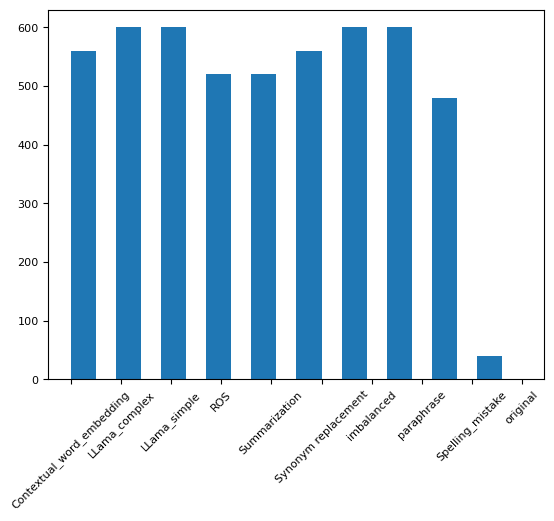

In [166]:
plt.hist(df["Balancing method"], width=0.5)
plt.xticks(rotation=45)

In [167]:
[x for x in df2.model if "llama" in x.lower()]

['erqaser_movie_50_LLama_simple_0_SVM.obj',
 'erqaser_movie_50_LLama_simple_0_SVM.obj',
 'erqaser_movie_50_LLama_simple_0_SVM.obj',
 'erqaser_movie_50_LLama_simple_0_SVM.obj',
 'erqaser_movie_50_LLama_simple_0_SVM.obj',
 'erqaser_movie_50_LLama_simple_0_SVM.obj',
 'erqaser_movie_50_LLama_simple_0_SVM.obj',
 'erqaser_movie_50_LLama_simple_0_SVM.obj',
 'erqaser_movie_50_LLama_simple_0_SVM.obj',
 'erqaser_movie_50_LLama_simple_0_SVM.obj',
 'erqaser_movie_50_LLama_simple_0_SVM.obj',
 'erqaser_movie_50_LLama_simple_0_SVM.obj',
 'erqaser_movie_50_LLama_simple_0_SVM.obj',
 'erqaser_movie_50_LLama_simple_0_SVM.obj',
 'erqaser_movie_50_LLama_simple_0_SVM.obj',
 'erqaser_movie_50_LLama_simple_0_SVM.obj',
 'erqaser_movie_50_LLama_simple_0_SVM.obj',
 'erqaser_movie_50_LLama_simple_0_SVM.obj',
 'erqaser_movie_50_LLama_simple_0_SVM.obj',
 'erqaser_movie_50_LLama_simple_0_SVM.obj',
 'erqaser_movie_50_LLama_simple_0_SVM.obj',
 'erqaser_movie_50_LLama_simple_0_SVM.obj',
 'erqaser_movie_50_LLama_simple_

In [168]:
df_tm = df
df_tm["test"]=df["words_sentence"].apply(lambda x:len(ast.literal_eval(x)))
df_tm.sort_values(["test"])

,Balancing method,Imbalance %,Model name,Model ID,id,words_sentence,lime_sentence,words_word,lime_word,test
228,paraphrase,50,SVM,4,28,"['Awesome', 'Totally', 'surprised', 'by', 'thi...","[0.11042003505728969, -0.0007587851254423868, ...",['Awesome' 'It' 'Microsoft' 'Totally' 'Vista' ...,"[0.11042003505728969, -0.004685116367525568, 0...",16
908,LLama_simple,10,SVM,4,28,"['Awesome', 'Totally', 'surprised', 'by', 'thi...","[0.42996503951315024, 0.015072162552775735, 0....",['Awesome' 'It' 'Microsoft' 'Totally' 'Vista' ...,"[0.42996503951315024, -0.058396282895878386, 0...",16
4748,Spelling_mistake,10,SVM,4,28,"['Awesome', 'Totally', 'surprised', 'by', 'thi...","[0.4670464126384612, 0.05086832665048153, 0.15...",['Awesome' 'It' 'Microsoft' 'Totally' 'Vista' ...,"[0.4670464126384612, -0.0947170511525, -0.0241...",16
308,Synonym replacement,10,SVM,4,28,"['Awesome', 'Totally', 'surprised', 'by', 'thi...","[0.5851713600650927, 0.05654904072441022, 0.17...",['Awesome' 'It' 'Microsoft' 'Totally' 'Vista' ...,"[0.5851713600650927, -0.15727355513457317, -0....",16
2548,imbalanced,10,SVM,4,28,"['Awesome', 'Totally', 'surprised', 'by', 'thi...","[0.40242590371822695, 0.02066784619950105, 0.1...",['Awesome' 'It' 'Microsoft' 'Totally' 'Vista' ...,"[0.40242590371822695, -0.1002362685054212, -0....",16
...,...,...,...,...,...,...,...,...,...,...
1857,Contextual_word_embedding,50,SVM,1,17,"['Inexpensive', 'multi', 'talented', 'tablet',...","[-0.011297903557119156, 0.017086533030444467, ...",['0' '1' '10' '1080' '1080p' '1600x1200' '2' '...,"[-0.00616392706171393, 0, 0, 0, 0, 0, 0, 0, 0,...",861
3337,LLama_complex,50,SVM,1,17,"['Inexpensive', 'multi', 'talented', 'tablet',...","[0, 0.020551609687979575, 0, 0.019860090771313...",['0' '1' '10' '1080' '1080p' '1600x1200' '2' '...,"[0, 0, 0, 0, 0.011456897684137612, 0, 0, 0, 0,...",861
1217,LLama_simple,50,SVM,1,17,"['Inexpensive', 'multi', 'talented', 'tablet',...","[0, 0.019278925241107164, 0, 0.016834969839764...",['0' '1' '10' '1080' '1080p' '1600x1200' '2' '...,"[0, 0, 0, 0, 0.009514334606256534, 0, 0, 0, 0,...",861
537,Summarization,20,SVM,2,17,"['Inexpensive', 'multi', 'talented', 'tablet',...","[0, 0, 0, 0.010155788282926804, 0.068193726533...",['0' '1' '10' '1080' '1080p' '1600x1200' '2' '...,"[0, 0, 0, 0, 0.013269854736935581, -0.01180141...",861


_________________ original _________________
to kyros or not to kyros for my use and the price and being american made i hope the only thing i don t like and the only reason 
i did nt give it 5 stars is there is no way to change the battery when it goes bad and it will go bad 

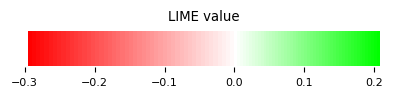

_________________ Contextual_word_embedding _________________
to kyros or not to kyros for my use and the price and being american made i hope the only thing i don t like and the only reason 
i did nt give it 5 stars is there is no way to change the battery when it goes bad and it will go bad 

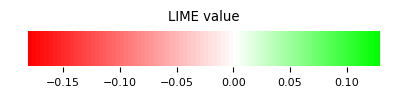

_________________ LLama_complex _________________
to kyros or not to kyros for my use and the price and being american made i hope the only thing i don t like and the only reason 
i did nt give it 5 stars is there is no way to change the battery when it goes bad and it will go bad 

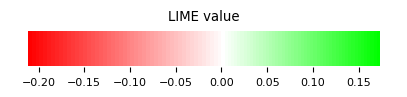

_________________ LLama_simple _________________
to kyros or not to kyros for my use and the price and being american made i hope the only thing i don t like and the only reason 
i did nt give it 5 stars is there is no way to change the battery when it goes bad and it will go bad 

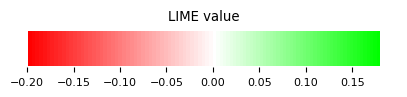

_________________ ROS _________________
to kyros or not to kyros for my use and the price and being american made i hope the only thing i don t like and the only reason 
i did nt give it 5 stars is there is no way to change the battery when it goes bad and it will go bad 

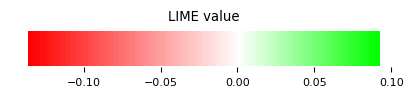

_________________ Spelling_mistake _________________
to kyros or not to kyros for my use and the price and being american made i hope the only thing i don t like and the only reason 
i did nt give it 5 stars is there is no way to change the battery when it goes bad and it will go bad 

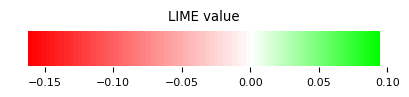

_________________ Summarization _________________
to kyros or not to kyros for my use and the price and being american made i hope the only thing i don t like and the only reason 
i did nt give it 5 stars is there is no way to change the battery when it goes bad and it will go bad 

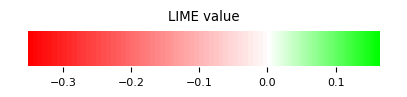

_________________ Synonym replacement _________________
to kyros or not to kyros for my use and the price and being american made i hope the only thing i don t like and the only reason 
i did nt give it 5 stars is there is no way to change the battery when it goes bad and it will go bad 

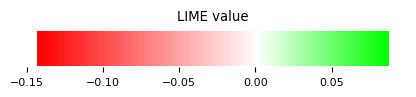

_________________ imbalanced _________________
to kyros or not to kyros for my use and the price and being american made i hope the only thing i don t like and the only reason 
i did nt give it 5 stars is there is no way to change the battery when it goes bad and it will go bad 

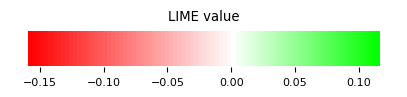

_________________ paraphrase _________________
to kyros or not to kyros for my use and the price and being american made i hope the only thing i don t like and the only reason 
i did nt give it 5 stars is there is no way to change the battery when it goes bad and it will go bad 

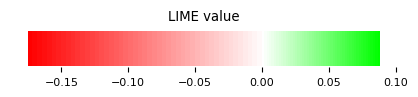

In [169]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12
plt.rc('font', size=SMALL_SIZE)  
def color_output(words, explanations):
    coloring_range = ( np.min(explanations), np.max(explanations))
    l=0
    for j in range(len(words)):
        if explanations[j]<0:
            perc = explanations[j]/coloring_range[0]
            r, g, b = 255,int(-255*perc+255),int(-255*perc+255)
        else:
            perc = explanations[j]/coloring_range[1]
            r, g, b = int(-255*perc+255),255,int(-255*perc+255)
        l+=len(words[j])
        if l>100:
            print("\n",end="")
            l=0
        print(f'\033[38;2;{r};{g};{b}m\033[48;2;0;0;0m{words[j]} \033[0m', end="") 
    
    n = 50
    lin_1 = np.linspace(coloring_range[0],0,n)
    diff_1 = lin_1[1]-lin_1[0]
    lin_2 = np.linspace(0, coloring_range[1],n)
    diff_2 = lin_2[1]-lin_2[0]
    # plt.style.use('dark_background')
    fig, ax = plt.subplots(figsize=(5,1/2))
    plt.plot()

    for i in range(n):
        perc = (lin_1[0]-lin_1[i])/coloring_range[0]
        rect = patches.Rectangle((coloring_range[0]-lin_1[i], 0), diff_1, 1, facecolor=(1,int(-255*perc+255)/255,int(-255*perc+255)/255))
        ax.add_patch(rect)
        perc = (lin_2[i])/coloring_range[1]
        rect = patches.Rectangle((lin_2[i], 0), diff_2, 1, facecolor=(int(-255*perc+255)/255,1,int(-255*perc+255)/255))
        ax.add_patch(rect)
    ax.get_yaxis().set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    plt.title("LIME value")
    plt.show()
    
df_tmp = df[(df["id"]==4)&((df["Imbalance %"].astype(int)==20)| (df["Imbalance %"].astype(int)==100))&(df["Model ID"].astype(int)==0)&(df["Balancing method"]!="LLama")]
tmp = 5 if task=="Amazon" else 6
for val in df_tmp.values:
    print(f"_________________ {val[0]} _________________")    
    color_output(ast.literal_eval(val[tmp]), ast.literal_eval(val[tmp+1]))

In [170]:
# Method used to calculate p_values from wilcoxon-signed rank test between two explanations
def get_p_values(df, lime="lime_sentence"):
    results = []
    
    # Selecting model trained on original data for comparison
    original = df[df["Balancing method"]=="original"]

    # Looping through imbalance % model id balancing method and instances
    for imbalance in np.unique(df["Imbalance %"]):
        for model_id in np.unique(df["Model ID"]):
            # Selecting model trained on imbalanced data for comparison
            df_tmp = df[(df["Imbalance %"]==imbalance)&(df["Model ID"]==model_id)&(df["Balancing method"]!="original")]
            imbalanced = df_tmp[df_tmp["Balancing method"]=="imbalanced"]
            # Filtering models based on balanced datasets
            other_methods = df_tmp[df_tmp["Balancing method"]!="imbalanced"]
            for method in np.unique(other_methods["Balancing method"]):
                for i in np.unique(other_methods.id)[:2]:
                    # Saving basic model identification
                    res = {}
                    res["Model ID"] = model_id
                    res["Imbalance %"] = imbalance
                    res["Balancing method"] = method
                    res["id"] = i
                    # Comparing xai from original model and xai from balanced model
                    df_tmp = other_methods[other_methods["Balancing method"]==method]
                    x1 = ast.literal_eval(df_tmp[df_tmp.id==i][lime].values[0])
                    x2 = ast.literal_eval(original[original.id==i][lime].values[0])
                    res["original"] = stats.wilcoxon(x1, x2)[1]
                    res["spearman_original"] = spearmanr(x1, x2)[0]
                    res["normality_original"] = kstest(np.array(x1)-np.array(x2), 'norm')[1]
                    # Comparing xai from imbalanced model and xai from balanced model if imbalanced model was not bad (acc>0.6 & f1!=0)
                    if len(imbalanced)>0:
                        x3 = ast.literal_eval(imbalanced[imbalanced.id==i][lime].values[0])
                        res["imbalanced"] = stats.wilcoxon(x1, x3)[1]
                        res["spearman_imbalanced"] = spearmanr(x1, x3)[0]
                        res["normality_imbalanced"] = kstest(np.array(x1)-np.array(x2), 'norm')[1]
                    results.append(res)
    return pd.DataFrame(results)

results_sentence = get_p_values(df, lime="lime_sentence")
results_word = get_p_values(df, lime="lime_word")
results_sentence.head().round(4)

,Model ID,Imbalance %,Balancing method,id,original,spearman_original,normality_original,imbalanced,spearman_imbalanced,normality_imbalanced
0,0,10,Contextual_word_embedding,0,0.0002,0.6690,0.0,0.0180,0.7725,0.0
1,0,10,Contextual_word_embedding,1,0.0333,0.4890,0.0,0.0005,0.8123,0.0
2,0,10,LLama_complex,0,0.0000,0.8591,0.0,0.0054,0.9397,0.0
3,0,10,LLama_complex,1,0.7919,0.6749,0.0,0.3872,0.9367,0.0
4,0,10,LLama_simple,0,0.0000,0.8659,0.0,0.9590,0.9369,0.0


In [171]:
# Method used to join results and metrics tables
def add_metrics(results, metrics):
    
    # Changing column types to get agreement between tables
    results['Model ID'] = results['Model ID'].astype(str)
    metrics['Model ID'] = metrics['Model ID'].astype(str)
    results['Imbalance %'] = results['Imbalance %'].astype(str)
    metrics['Imbalance %'] = metrics['Imbalance %'].astype(str)
    
    # Merging tables
    final = results.merge(metrics, on=['Model ID', 'Imbalance %', 'Balancing method'], how='left')
    
    # Removal of bad models that slipped through initial filtering due to a spelling mistake
    return final[(final["auc"]>=0.6) & (final["f1"]!=0)]


# Adding metric values 
if task == "Amazon":
    metrics = pd.read_csv(f"amazon-review_{model_name}.csv")
else:
    metrics = pd.read_csv(f"nlpaug_{model_name}.csv")
metrics = metrics[metrics["Model name"]==model_name]
final_sentence = add_metrics(results_sentence, metrics)
final_word = add_metrics(results_word, metrics)
display(final_sentence.head())
final_sentence.shape

,Model ID,Imbalance %,Balancing method,id,original,spearman_original,normality_original,imbalanced,spearman_imbalanced,normality_imbalanced,...,Model name,acc,f1,precision,recall,mcc,auc,spearman,spearman_pval,ID
0,0,10,Contextual_word_embedding,0,0.000177,0.669013,3.896994e-45,0.018000,0.772474,3.896994e-45,...,SVM,0.699289,0.691729,0.971617,0.537030,0.518222,0.935753,1.0,6.646897e-64,Contextual_word_embedding100SVM
1,0,10,Contextual_word_embedding,1,0.033341,0.488971,1.591632e-45,0.000518,0.812264,1.591632e-45,...,SVM,0.699289,0.691729,0.971617,0.537030,0.518222,0.935753,1.0,6.646897e-64,Contextual_word_embedding100SVM
2,0,10,LLama_complex,0,0.000005,0.859140,2.113707e-45,0.005363,0.939696,2.113707e-45,...,SVM,0.766674,0.778214,0.965928,0.651587,0.599252,0.936029,1.0,6.646897e-64,LLama_complex100SVM
3,0,10,LLama_complex,1,0.791944,0.674938,8.640080e-45,0.387181,0.936669,8.640080e-45,...,SVM,0.766674,0.778214,0.965928,0.651587,0.599252,0.936029,1.0,6.646897e-64,LLama_complex100SVM
4,0,10,LLama_simple,0,0.000001,0.865935,2.159857e-45,0.958996,0.936917,2.159857e-45,...,SVM,0.770342,0.782079,0.968228,0.655965,0.605603,0.936662,1.0,6.646897e-64,LLama_simple100SVM


(222, 21)

# Are differences between lime normally distributed?

In [172]:
print("Sentence")
df_tmp = final_sentence[["normality_original", "normality_imbalanced", "f1"]].dropna()

df_tmp = df_tmp.drop("f1", axis=1)
# Calculating descriptive statistics

display(pd.DataFrame(data={"mean": np.round(np.mean(df_tmp, axis=0), 4),
                    "median": np.round(np.median(df_tmp, axis=0), 4),
                    "rejection rate": np.round(np.mean(df_tmp<0.05, axis=0), 4) }))

print("Word")
df_tmp = final_sentence[["normality_original", "normality_imbalanced", "f1"]].dropna()

df_tmp = df_tmp.drop("f1", axis=1)
# Calculating descriptive statistics
pd.DataFrame(data={"mean": np.round(np.mean(df_tmp, axis=0), 4),
                    "median": np.round(np.median(df_tmp, axis=0), 4),
                    "rejection rate": np.round(np.mean(df_tmp<0.05, axis=0), 4) })

Sentence


,mean,median,rejection rate
normality_original,0.0,0.0,1.0
normality_imbalanced,0.0,0.0,1.0


Word


,mean,median,rejection rate
normality_original,0.0,0.0,1.0
normality_imbalanced,0.0,0.0,1.0


# Are balanced models more similar to original or imbalanced model?

In [173]:
# Method used to calculate descriptive statistics of p-values comparing XAI of balanced models to XAI of original and imbalanced models
def similarity_balanced_imbalanced(final_sentence, final_word, threshold = None, spearman=False, good=True):
    def get_similarity(final, threshold, spearman, good):
        # Filtering models if threshold was provided
        if 1-spearman:
            df_tmp = final[["original", "imbalanced", "f1"]].dropna()
        else:
            df_tmp = final[["spearman_original", "spearman_imbalanced", "f1"]].dropna()
        
        
        if threshold != None:
            df_tmp1 = df_tmp[df_tmp.f1>threshold]
            df_tmp1 = df_tmp.drop("f1", axis=1)
            res = pd.DataFrame(data={"mean good": np.round(np.mean(df_tmp1, axis=0), 4),
                                "median good": np.round(np.median(df_tmp1, axis=0), 4),
                                "rejection rate good": np.round(np.mean(df_tmp1<0.05, axis=0), 4) })
            df_tmp = df_tmp[df_tmp.f1<=threshold]
            df_tmp = df_tmp.drop("f1", axis=1)
            res = pd.concat([res,pd.DataFrame(data={"mean bad": np.round(np.mean(df_tmp, axis=0), 4),
                                "median bad": np.round(np.median(df_tmp, axis=0), 4),
                                "rejection rate bad": np.round(np.mean(df_tmp<0.05, axis=0), 4) })], axis=1)
        else:
            # Calculating descriptive statistics
            df_tmp = df_tmp.drop("f1", axis=1)
            res = pd.DataFrame(data={"mean": np.round(np.mean(df_tmp, axis=0), 4),
                                "median": np.round(np.median(df_tmp, axis=0), 4),
                                "rejection rate": np.round(np.mean(df_tmp<0.05, axis=0), 4) })
        if spearman and threshold==None:
            res=res.drop(["rejection rate"], axis=1)
        elif spearman:
            res=res.drop(["rejection rate good"], axis=1).drop(["rejection rate bad"], axis=1)
        return res
    res = pd.concat([get_similarity(final_sentence, threshold, spearman, good), get_similarity(final_word, threshold, spearman, good)])
    
    res["level"] = ["sentence", "sentence", "word", "word"]
    res = res[["level"]+list(res.columns)[:-1]]
    l = res.reset_index().astype(str).to_latex(index=False)
    l = l.replace("_", "\_").replace("%", "\%").replace("\n\\bottomrule","\hline").replace("\n\\midrule","\hline").replace("\n\\toprule","\hline").replace(r"begin{tabular}{",r"begin{tabular}{|").replace("}\\hline\n","|}\\hline\n").replace("index", " ")
    l = "\\\\\hline\noriginal".join(l.split("\\\\\noriginal"))
    print(l)
    display(res)
    
    



similarity_balanced_imbalanced(final_sentence,final_word)


\begin{tabular}{|lllll|}\hline
  & level & mean & median & rejection rate \\\hline
original & sentence & 0.1197 & 0.0016 & 0.6892 \\
imbalanced & sentence & 0.1415 & 0.0088 & 0.6306 \\\hline
original & word & 0.3206 & 0.1988 & 0.036 \\
imbalanced & word & 0.4025 & 0.3713 & 0.1081 \\\hline
\end{tabular}



,level,mean,median,rejection rate
original,sentence,0.1197,0.0016,0.6892
imbalanced,sentence,0.1415,0.0088,0.6306
original,word,0.3206,0.1988,0.0360
imbalanced,word,0.4025,0.3713,0.1081


### Spearman

In [174]:
similarity_balanced_imbalanced(final_sentence, final_word, spearman = True)


\begin{tabular}{|llll|}\hline
  & level & mean & median \\\hline
spearman\_original & sentence & 0.8125 & 0.851 \\
spearman\_imbalanced & sentence & 0.9238 & 0.9453 \\
spearman\_original & word & 0.7871 & 0.8235 \\
spearman\_imbalanced & word & 0.9094 & 0.934 \\\hline
\end{tabular}



,level,mean,median
spearman_original,sentence,0.8125,0.8510
spearman_imbalanced,sentence,0.9238,0.9453
spearman_original,word,0.7871,0.8235
spearman_imbalanced,word,0.9094,0.9340


# Which method results in models the most similar to original model?

### Sentence

In [175]:
# Method used to calculate descriptive statistics of p-values comparing XAI of balanced models to XAI of original model with regard to all balancing methods
def similarity_balancing_methods(final, threshold = None, spearman = False, pr = True):
        def get_result_table(df_tmp, good=True):
            df_tmp = df_tmp.drop("f1", axis=1)
            res = []
            # Calculating descriptive statistics
            for method in np.unique(df_tmp["Balancing method"]):
                df_ = df_tmp[df_tmp["Balancing method"]==method]["original"] if 1-spearman else df_tmp[df_tmp["Balancing method"]==method]["spearman_original"]
                res.append([method, np.round(np.mean(df_),4), np.round(np.median(df_),4), np.round(np.mean(df_<0.05),4)])
            r = pd.DataFrame(res)
            r.columns = ["Balancing method", "mean", "median", "rejection rate"]
            if spearman:
                r=r.drop(["rejection rate"], axis=1)
            r.index = r["Balancing method"]
            r = r.drop(["Balancing method"], axis=1)
            if threshold != None:
                if good:
                    r.columns = [col+" good" for col in r.columns]
                else:
                    r.columns = [col+" bad" for col in r.columns]
            return r
            
        
        # Filtering models if threshold was provided
        df_tmp = final[["Balancing method", "original", "f1"]].dropna() if 1-spearman else final[["Balancing method", "spearman_original", "f1"]].dropna()
        if threshold != None:
            r = pd.concat([get_result_table(df_tmp[df_tmp.f1>threshold], True), get_result_table(df_tmp[df_tmp.f1<=threshold], False)], axis=1)
        else:
            r = get_result_table(df_tmp)
        return r      

# Method used to create Latex table of descriptive statistics of p-values comparing XAI of balanced models to XAI of original model with regard to all balancing methods
def get_similarity_table(final_sentence, final_word, threshold = None, spearman = False, pr = True):
    
    r1 = similarity_balancing_methods(final_sentence, threshold, spearman, pr)
    r2 = similarity_balancing_methods(final_word, threshold, spearman, pr) 
    r1.columns = [c+"_sen" for c in r1.columns]
    r2.columns = [c+"_wor" for c in r2.columns]
    r=r1.join(r2)
    if pr: 
        display(r)
    l = r.reset_index().astype(str).to_latex(index=False)
    l = l.replace("_", "\_").replace("%", "\%").replace("\n\\bottomrule","\hline").replace("\n\\midrule","\hline").replace("\n\\toprule","\hline").replace(r"begin{tabular}{",r"begin{tabular}{|").replace("}\\hline\n","|}\\hline\n").replace("index", " ")
    
    replacement_text = '\\begin{tabular}{|l|lll|lll|}\\hline\nBalancing method &  \multicolumn{'
    replacement_text += "2" if spearman else "3"
    replacement_text += '}{|c|}{Sentence}   &   \multicolumn{'
    replacement_text += "2" if spearman else "3"
    replacement_text += '}{|c|}{Word}  \\\\\n  & mean  & median  & rejection rate  & mean  & median  & rejection rate '

    l =l.replace('\\begin{tabular}{|lllllll|}\\hline\nBalancing method & mean\_sen & median\_sen & rejection rate\_sen & mean\_wor & median\_wor & rejection rate\_wor', replacement_text)
    
    print(l)   


get_similarity_table(final_sentence, final_word)

print()


,mean_sen,median_sen,rejection rate_sen,mean_wor,median_wor,rejection rate_wor
Balancing method,,,,,,
Contextual_word_embedding,0.2020,0.0171,0.5714,0.2590,0.1631,0.0357
LLama_complex,0.1091,0.0011,0.8000,0.2855,0.1616,0.1000
LLama_simple,0.0842,0.0010,0.8000,0.2820,0.1445,0.1000
ROS,0.0774,0.0003,0.7692,0.2526,0.1102,0.0385
Spelling_mistake,0.1394,0.0042,0.6667,0.2863,0.1739,0.0000
Summarization,0.1841,0.1541,0.1923,0.6820,0.6703,0.0000
Synonym replacement,0.0823,0.0002,0.8571,0.2643,0.1044,0.0000
paraphrase,0.0892,0.0005,0.8000,0.2777,0.1419,0.0000


\begin{tabular}{|l|lll|lll|}\hline
Balancing method &  \multicolumn{3}{|c|}{Sentence}   &   \multicolumn{3}{|c|}{Word}  \\
  & mean  & median  & rejection rate  & mean  & median  & rejection rate  \\\hline
Contextual\_word\_embedding & 0.202 & 0.0171 & 0.5714 & 0.259 & 0.1631 & 0.0357 \\
LLama\_complex & 0.1091 & 0.0011 & 0.8 & 0.2855 & 0.1616 & 0.1 \\
LLama\_simple & 0.0842 & 0.001 & 0.8 & 0.282 & 0.1445 & 0.1 \\
ROS & 0.0774 & 0.0003 & 0.7692 & 0.2526 & 0.1102 & 0.0385 \\
Spelling\_mistake & 0.1394 & 0.0042 & 0.6667 & 0.2863 & 0.1739 & 0.0 \\
Summarization & 0.1841 & 0.1541 & 0.1923 & 0.682 & 0.6703 & 0.0 \\
Synonym replacement & 0.0823 & 0.0002 & 0.8571 & 0.2643 & 0.1044 & 0.0 \\
paraphrase & 0.0892 & 0.0005 & 0.8 & 0.2777 & 0.1419 & 0.0 \\\hline
\end{tabular}




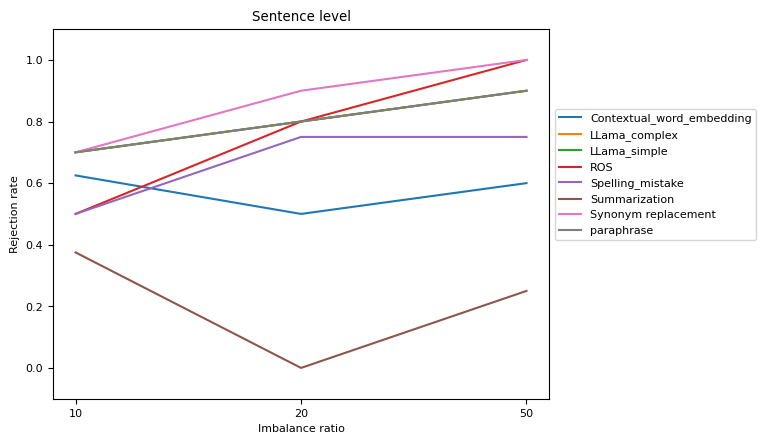

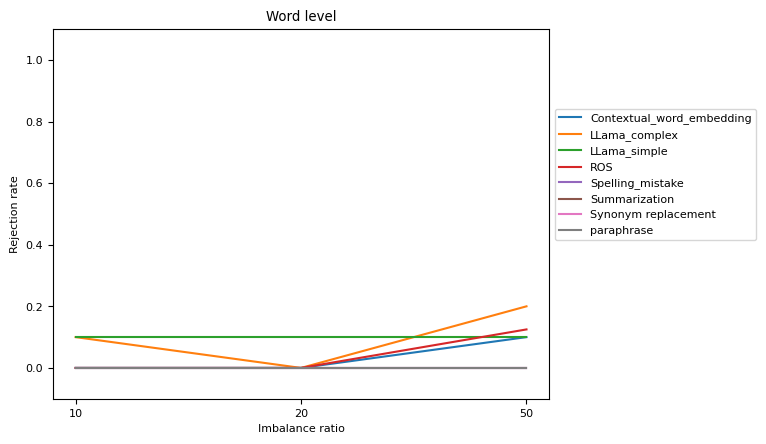

In [176]:

r = pd.concat([similarity_balancing_methods(final_sentence[final_sentence["Imbalance %"]==str(ratio)], pr=False)["rejection rate"] for ratio in [10,20,50]],axis=1)
for bal in r.index:
    plt.plot(r[r.index == bal].values[0], label=bal)
plt.legend(loc='upper left', bbox_to_anchor=(1, 0.8))
plt.xticks([0,1,2],[10,20,50])
plt.ylim(-0.1,1.1)
plt.xlabel("Imbalance ratio")
plt.ylabel("Rejection rate")
plt.title("Sentence level")
plt.savefig(fr"C:\Users\Maciek\Downloads\xai_rr_ratio_sen_{model_name}_{task}.png", bbox_inches='tight')
plt.show()

r = pd.concat([similarity_balancing_methods(final_word[final_word["Imbalance %"]==str(ratio)], pr=False)["rejection rate"] for ratio in [10,20,50]],axis=1)
for bal in r.index:
    plt.plot(r[r.index == bal].values[0], label=bal)
plt.legend(loc='upper left', bbox_to_anchor=(1, 0.8))
plt.ylim(-0.1,1.1)
plt.xticks([0,1,2],[10,20,50])
plt.xlabel("Imbalance ratio")
plt.ylabel("Rejection rate")
plt.title("Word level")
plt.savefig(fr"C:\Users\Maciek\Downloads\xai_rr_ratio_wor_{model_name}_{task}.png", bbox_inches='tight')
plt.show()

In [177]:
get_similarity_table(final_sentence, final_word, spearman = True)

,mean_sen,median_sen,mean_wor,median_wor
Balancing method,,,,
Contextual_word_embedding,0.8024,0.8523,0.8115,0.8299
LLama_complex,0.8596,0.8948,0.8376,0.8602
LLama_simple,0.8612,0.8883,0.8389,0.8585
ROS,0.7961,0.8484,0.7521,0.8134
Spelling_mistake,0.7824,0.8431,0.7650,0.8222
Summarization,0.8245,0.8199,0.7910,0.7937
Synonym replacement,0.7727,0.8031,0.7219,0.7558
paraphrase,0.7910,0.8297,0.7675,0.7872


\begin{tabular}{|lllll|}\hline
Balancing method & mean\_sen & median\_sen & mean\_wor & median\_wor \\\hline
Contextual\_word\_embedding & 0.8024 & 0.8523 & 0.8115 & 0.8299 \\
LLama\_complex & 0.8596 & 0.8948 & 0.8376 & 0.8602 \\
LLama\_simple & 0.8612 & 0.8883 & 0.8389 & 0.8585 \\
ROS & 0.7961 & 0.8484 & 0.7521 & 0.8134 \\
Spelling\_mistake & 0.7824 & 0.8431 & 0.765 & 0.8222 \\
Summarization & 0.8245 & 0.8199 & 0.791 & 0.7937 \\
Synonym replacement & 0.7727 & 0.8031 & 0.7219 & 0.7558 \\
paraphrase & 0.791 & 0.8297 & 0.7675 & 0.7872 \\\hline
\end{tabular}



Sentence


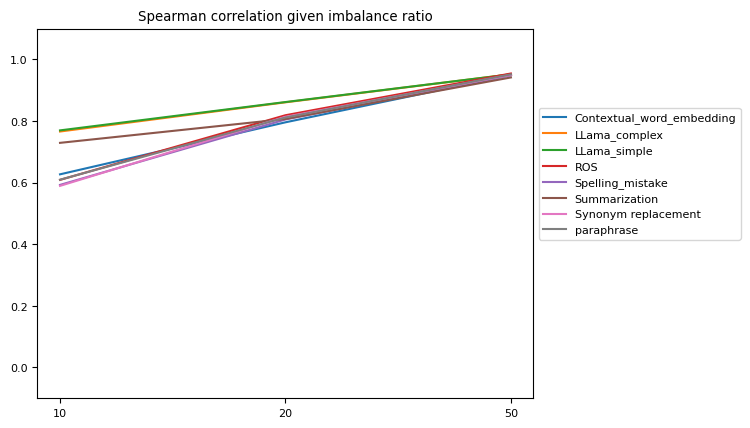

Word


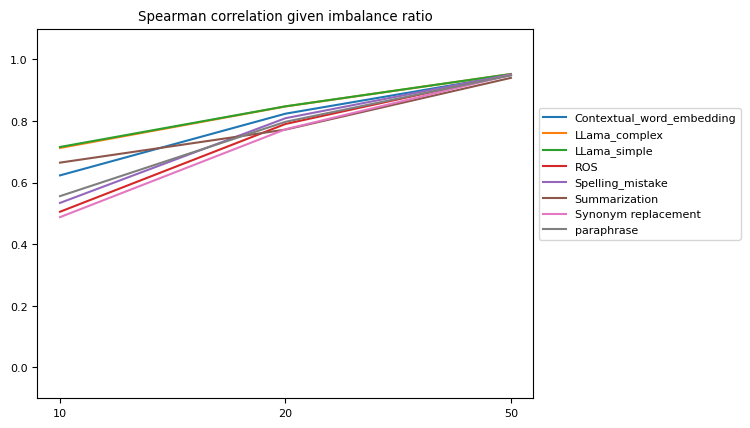

In [178]:
print("Sentence")
r = pd.concat([similarity_balancing_methods(final_sentence[final_sentence["Imbalance %"]==str(ratio)], pr=False, spearman = True)["mean"] for ratio in [10,20,50]],axis=1)
for bal in r.index:
    plt.plot(r[r.index == bal].values[0], label=bal)
plt.legend(loc='upper left', bbox_to_anchor=(1, 0.8))
plt.xticks([0,1,2],[10,20,50])
plt.ylim(-0.1,1.1)
plt.title("Spearman correlation given imbalance ratio")
plt.show()

print("Word")
r = pd.concat([similarity_balancing_methods(final_word[final_word["Imbalance %"]==str(ratio)], pr=False, spearman = True)["mean"] for ratio in [10,20,50]],axis=1)
for bal in r.index:
    plt.plot(r[r.index == bal].values[0], label=bal)
plt.legend(loc='upper left', bbox_to_anchor=(1, 0.8))
plt.ylim(-0.1,1.1)
plt.xticks([0,1,2],[10,20,50])
plt.title("Spearman correlation given imbalance ratio")
plt.show()

# Now what if we remove models that performed significantly worse than original model based on f1

In [179]:
# Getting f1 score of model trained on original data
f1 = metrics[(metrics["Balancing method"]=="original")&(metrics["Model name"]==model_name)].f1.values[0]
print(f"F1 score of original model: {np.round(f1, 2)}")
print(f"Threshold- 80% of F1 of original model: {np.round(f1*0.8, 2)}")
# Calculating threshold
threshold = np.round(f1*0.8, 2)
metrics_temp = metrics[(metrics.auc>0.6) & (metrics.f1!=0)]
print(f"This further removes {len(metrics_temp[metrics_temp.f1>threshold])} ({np.round(len(metrics_temp[metrics_temp.f1>threshold])/len(metrics_temp)*100,1)}%) of remaining models")


F1 score of original model: 0.92
Threshold- 80% of F1 of original model: 0.74
This further removes 106 (77.9%) of remaining models


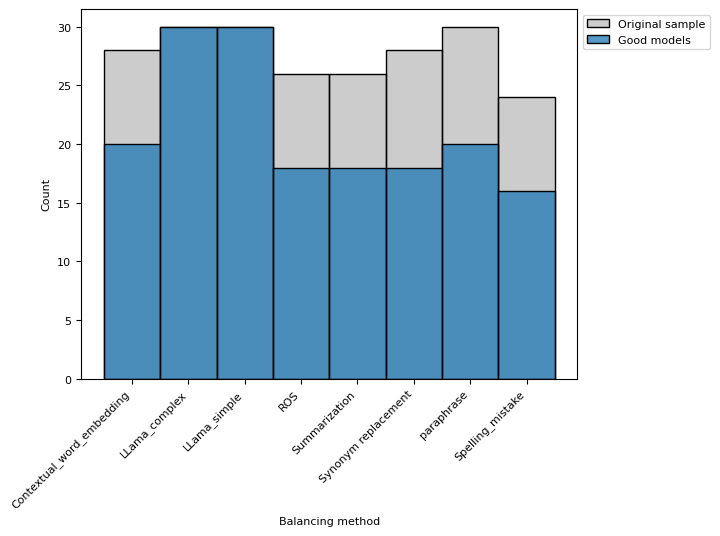

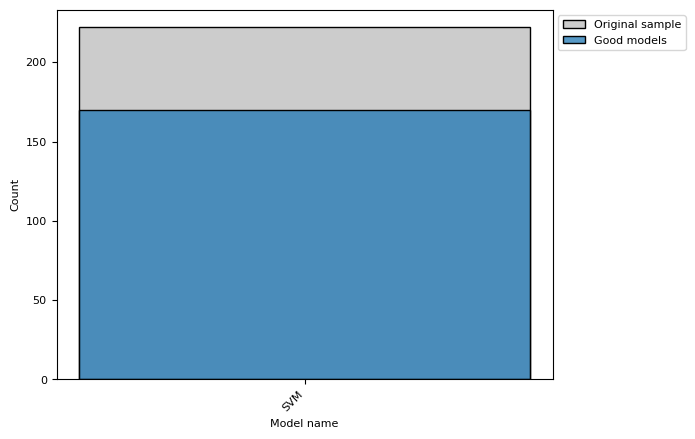

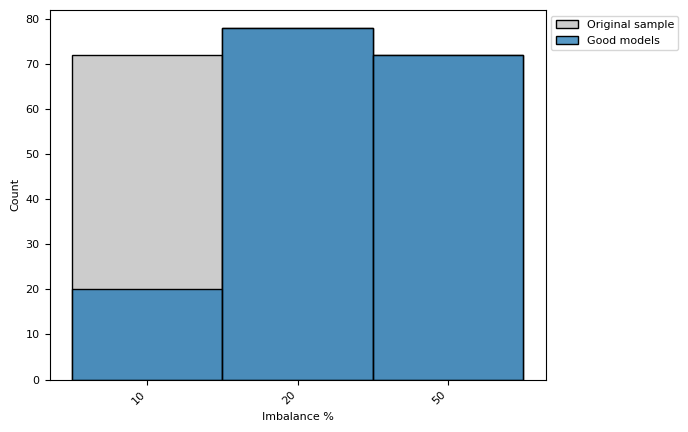

In [180]:
for dimension in ["Balancing method", "Model name", "Imbalance %"]:
    sns.histplot(final_word[dimension].astype(str),color="gray", alpha=.4, label="Original sample")
    metrics_temp = final_word[final_word.f1>=threshold]
    g=sns.histplot(metrics_temp[dimension].astype(str),label="Good models")
    plt.xticks(rotation=45, ha="right")
    plt.legend()
    sns.move_legend(g, "upper left", bbox_to_anchor=(1,1))
    plt.savefig(out+"\\"+f"removal_of_bad_xai_{model_name}_{dimension.split(' ')[0]}_{task}.png", bbox_inches='tight')
    plt.show()

# Are balanced models more similar to original or imbalanced model?

### Sentence

In [181]:
# Method used to calculate descriptive statistics of p-values comparing XAI of balanced models to XAI of original and imbalanced models
def similarity_balanced_imbalanced(final_sentence, final_word, threshold = None, spearman=False, good=True):
    def get_similarity(final, threshold, spearman, good):
        # Filtering models if threshold was provided
        if 1-spearman:
            df_tmp = final[["original", "imbalanced", "f1"]].dropna()
        else:
            df_tmp = final[["spearman_original", "spearman_imbalanced", "f1"]].dropna()
        
        
        if threshold != None:
            df_tmp1 = df_tmp[df_tmp.f1>threshold]
            df_tmp1 = df_tmp.drop("f1", axis=1)
            res = pd.DataFrame(data={"mean good": np.round(np.mean(df_tmp1, axis=0), 4),
                                "median good": np.round(np.median(df_tmp1, axis=0), 4),
                                "rejection rate good": np.round(np.mean(df_tmp1<0.05, axis=0), 4) })
            df_tmp = df_tmp[df_tmp.f1<=threshold]
            df_tmp = df_tmp.drop("f1", axis=1)
            res = pd.concat([res,pd.DataFrame(data={"mean bad": np.round(np.mean(df_tmp, axis=0), 4),
                                "median bad": np.round(np.median(df_tmp, axis=0), 4),
                                "rejection rate bad": np.round(np.mean(df_tmp<0.05, axis=0), 4) })], axis=1)
        else:
            # Calculating descriptive statistics
            df_tmp = df_tmp.drop("f1", axis=1)
            res = pd.DataFrame(data={"mean": np.round(np.mean(df_tmp, axis=0), 4),
                                "median": np.round(np.median(df_tmp, axis=0), 4),
                                "rejection rate": np.round(np.mean(df_tmp<0.05, axis=0), 4) })
        if spearman and threshold==None:
            res=res.drop(["rejection rate"], axis=1)
        elif spearman:
            res=res.drop(["rejection rate good"], axis=1).drop(["rejection rate bad"], axis=1)
        return res
    res = pd.concat([get_similarity(final_sentence, threshold, spearman, good), get_similarity(final_word, threshold, spearman, good)])
    
    res["level"] = ["sentence", "sentence", "word", "word"]
    res = res[["level"]+list(res.columns)[:-1]]
    l = res.reset_index().astype(str).to_latex(index=False)
    l = l.replace("_", "\_").replace("%", "\%").replace("\n\\bottomrule","\hline").replace("\n\\midrule","\hline").replace("\n\\toprule","\hline").replace(r"begin{tabular}{",r"begin{tabular}{|").replace("}\\hline\n","|}\\hline\n").replace("index", " ")
    l = "\\\\\hline\noriginal".join(l.split("\\\\\noriginal"))
    if "median good" in res.columns:
        l=l.split("\\\\")[0].replace("mean good","").replace("median good","good models").replace("rejection rate good","").replace("mean bad","").replace("median bad","bad models").replace("rejection rate bad","")+"\\\\\n"+l.split("\\\\")[0].split("\hline\n")[1].replace("good","").replace("bad","").replace("level","").replace("rejection rate bad","")+"\\\\".join(l.split("\\\\")[1:])
        l=l.replace(" \\hline"," \\\\\hline").replace("|llllllll|","|ll|lll|lll|")
    print(l)
    display(res)

In [182]:
similarity_balanced_imbalanced(final_sentence, final_word, threshold)


\begin{tabular}{|ll|lll|lll|}\hline
  & level &  & good models &  &  & bad models &  \\
  &  & mean  & median  & rejection rate  & mean  & median  & rejection rate  \\\hline
original & sentence & 0.1197 & 0.0016 & 0.6892 & 0.1953 & 0.0163 & 0.5769 \\
imbalanced & sentence & 0.1415 & 0.0088 & 0.6306 & 0.0571 & 0.0009 & 0.8462 \\\hline
original & word & 0.3206 & 0.1988 & 0.036 & 0.4184 & 0.3473 & 0.0 \\
imbalanced & word & 0.4025 & 0.3713 & 0.1081 & 0.2846 & 0.1981 & 0.1731 \\\hline
\end{tabular}



,level,mean good,median good,rejection rate good,mean bad,median bad,rejection rate bad
original,sentence,0.1197,0.0016,0.6892,0.1953,0.0163,0.5769
imbalanced,sentence,0.1415,0.0088,0.6306,0.0571,0.0009,0.8462
original,word,0.3206,0.1988,0.0360,0.4184,0.3473,0.0000
imbalanced,word,0.4025,0.3713,0.1081,0.2846,0.1981,0.1731


### Spearman

In [183]:
display(similarity_balanced_imbalanced(final_sentence, final_word, threshold, spearman = True))


\begin{tabular}{|llllll|}\hline
  & level &  & good models &  & bad models \\
  &  & mean  & median  & mean  & median  \\\hline
spearman\_original & sentence & 0.8125 & 0.851 & 0.6242 & 0.6769 \\
spearman\_imbalanced & sentence & 0.9238 & 0.9453 & 0.8364 & 0.8685 \\
spearman\_original & word & 0.7871 & 0.8235 & 0.5591 & 0.5901 \\
spearman\_imbalanced & word & 0.9094 & 0.934 & 0.7963 & 0.8252 \\\hline
\end{tabular}



,level,mean good,median good,mean bad,median bad
spearman_original,sentence,0.8125,0.8510,0.6242,0.6769
spearman_imbalanced,sentence,0.9238,0.9453,0.8364,0.8685
spearman_original,word,0.7871,0.8235,0.5591,0.5901
spearman_imbalanced,word,0.9094,0.9340,0.7963,0.8252


None

# Which method results in models the most similar to original model?

In [184]:
print("Sentence")
display(similarity_balancing_methods(final_sentence, threshold))
print("Word")
similarity_balancing_methods(final_word, threshold)

Sentence


,mean good,median good,rejection rate good,mean bad,median bad,rejection rate bad
Balancing method,,,,,,
Contextual_word_embedding,0.2302,0.0171,0.5500,0.1316,0.0168,0.625
LLama_complex,0.1091,0.0011,0.8000,NaN,NaN,NaN
LLama_simple,0.0842,0.0010,0.8000,NaN,NaN,NaN
ROS,0.0176,0.0003,0.8889,0.2119,0.0354,0.500
Spelling_mistake,0.0789,0.0042,0.7500,0.2605,0.0374,0.500
Summarization,0.1845,0.1541,0.1111,0.1831,0.1150,0.375
Synonym replacement,0.0169,0.0002,0.9444,0.2001,0.0003,0.700
paraphrase,0.0409,0.0005,0.8500,0.1857,0.0007,0.700


Word


,mean good,median good,rejection rate good,mean bad,median bad,rejection rate bad
Balancing method,,,,,,
Contextual_word_embedding,0.2502,0.1631,0.0500,0.2812,0.1924,0.0
LLama_complex,0.2855,0.1616,0.1000,NaN,NaN,NaN
LLama_simple,0.2820,0.1445,0.1000,NaN,NaN,NaN
ROS,0.1622,0.1102,0.0556,0.4559,0.4144,0.0
Spelling_mistake,0.2408,0.1739,0.0000,0.3774,0.2261,0.0
Summarization,0.7550,0.7511,0.0000,0.5178,0.5346,0.0
Synonym replacement,0.1781,0.1044,0.0000,0.4195,0.2137,0.0
paraphrase,0.1914,0.1419,0.0000,0.4505,0.1775,0.0


### Spearman

In [185]:
print("Sentence")
display(similarity_balancing_methods(final_sentence, threshold, spearman = True))
print("Word")
similarity_balancing_methods(final_word, threshold, spearman = True)

Sentence


,mean good,median good,mean bad,median bad
Balancing method,,,,
Contextual_word_embedding,0.8725,0.9072,0.6271,0.6820
LLama_complex,0.8596,0.8948,NaN,NaN
LLama_simple,0.8612,0.8883,NaN,NaN
ROS,0.8792,0.9093,0.6091,0.6504
Spelling_mistake,0.8772,0.8957,0.5928,0.6652
Summarization,0.8668,0.8548,0.7293,0.7410
Synonym replacement,0.8744,0.8936,0.5896,0.6562
paraphrase,0.8817,0.9126,0.6096,0.6660


Word


,mean good,median good,mean bad,median bad
Balancing method,,,,
Contextual_word_embedding,0.8866,0.9095,0.6237,0.6774
LLama_complex,0.8376,0.8602,NaN,NaN
LLama_simple,0.8389,0.8585,NaN,NaN
ROS,0.8617,0.8702,0.5056,0.5257
Spelling_mistake,0.8803,0.8965,0.5343,0.5745
Summarization,0.8470,0.8252,0.6651,0.6631
Synonym replacement,0.8518,0.8624,0.4881,0.5114
paraphrase,0.8731,0.8985,0.5563,0.5632
